<a href="https://colab.research.google.com/github/shamong/Face-Mask-Detection-using-Convolutional-Neural-Network/blob/main/DL_Project_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1125.jpg', 'with_mask_2554.jpg', 'with_mask_1385.jpg', 'with_mask_3205.jpg', 'with_mask_2981.jpg']
['with_mask_1947.jpg', 'with_mask_1235.jpg', 'with_mask_3584.jpg', 'with_mask_2312.jpg', 'with_mask_2552.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_766.jpg', 'without_mask_3600.jpg', 'without_mask_2750.jpg', 'without_mask_3050.jpg', 'without_mask_126.jpg']
['without_mask_3008.jpg', 'without_mask_530.jpg', 'without_mask_246.jpg', 'without_mask_2725.jpg', 'without_mask_3253.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

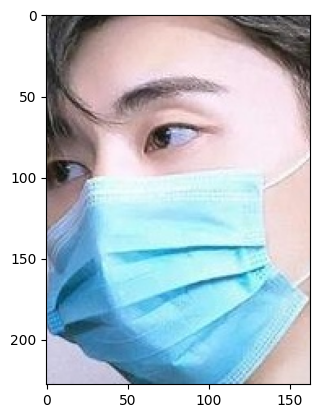

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

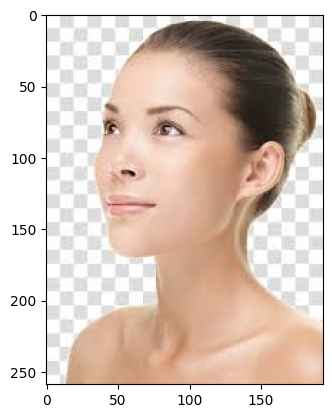

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[136, 107,  79],
        [136, 106,  82],
        [132, 102,  76],
        ...,
        [ 34,  28,  17],
        [ 55,  44,  26],
        [ 75,  59,  38]],

       [[131, 105,  79],
        [132, 104,  79],
        [133, 105,  79],
        ...,
        [ 25,  19,  11],
        [ 38,  28,  14],
        [ 73,  59,  41]],

       [[132, 105,  77],
        [132, 105,  78],
        [135, 109,  84],
        ...,
        [ 22,  18,  14],
        [ 29,  21,  13],
        [ 59,  48,  35]],

       ...,

       [[177, 175, 180],
        [175, 173, 179],
        [174, 172, 177],
        ...,
        [173, 164, 167],
        [174, 168, 168],
        [174, 168, 168]],

       [[177, 174, 181],
        [177, 174, 181],
        [177, 174, 181],
        ...,
        [174, 165, 171],
        [174, 168, 170],
        [174, 168, 168]],

       [[177, 174, 183],
        [177, 174, 183],
        [177, 174, 183],
        ...,
        [175, 166, 172],
        [175, 169, 171],
        [175, 169, 169]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[36, 26, 42],
        [36, 27, 43],
        [38, 29, 45],
        ...,
        [51, 41, 59],
        [51, 40, 57],
        [51, 40, 57]],

       [[37, 27, 43],
        [37, 28, 44],
        [38, 30, 46],
        ...,
        [53, 43, 62],
        [53, 43, 60],
        [53, 43, 60]],

       [[37, 28, 45],
        [37, 29, 46],
        [38, 32, 48],
        ...,
        [55, 45, 65],
        [56, 46, 64],
        [56, 46, 64]],

       ...,

       [[28, 15, 30],
        [28, 15, 30],
        [30, 15, 28],
        ...,
        [86, 76, 96],
        [87, 77, 97],
        [88, 77, 97]],

       [[27, 15, 31],
        [28, 15, 31],
        [30, 15, 30],
        ...,
        [83, 74, 94],
        [84, 75, 95],
        [85, 75, 95]],

       [[27, 15, 32],
        [28, 15, 32],
        [30, 16, 32],
        ...,
        [81, 72, 93],
        [83, 73, 94],
        [83, 73, 94]]], dtype=uint8)

In [ ]:
X_train_scaled[0]

array([[[0.14117647, 0.10196078, 0.16470588],
        [0.14117647, 0.10588235, 0.16862745],
        [0.14901961, 0.11372549, 0.17647059],
        ...,
        [0.2       , 0.16078431, 0.23137255],
        [0.2       , 0.15686275, 0.22352941],
        [0.2       , 0.15686275, 0.22352941]],

       [[0.14509804, 0.10588235, 0.16862745],
        [0.14509804, 0.10980392, 0.17254902],
        [0.14901961, 0.11764706, 0.18039216],
        ...,
        [0.20784314, 0.16862745, 0.24313725],
        [0.20784314, 0.16862745, 0.23529412],
        [0.20784314, 0.16862745, 0.23529412]],

       [[0.14509804, 0.10980392, 0.17647059],
        [0.14509804, 0.11372549, 0.18039216],
        [0.14901961, 0.1254902 , 0.18823529],
        ...,
        [0.21568627, 0.17647059, 0.25490196],
        [0.21960784, 0.18039216, 0.25098039],
        [0.21960784, 0.18039216, 0.25098039]],

       ...,

       [[0.10980392, 0.05882353, 0.11764706],
        [0.10980392, 0.05882353, 0.11764706],
        [0.11764706, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 [==============================] - 3s 20ms/step - loss: 0.0176 - acc: 0.9947 - val_loss: 0.3902 - val_acc: 0.9471
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0282 - acc: 0.9921 - val_loss: 0.3473 - val_acc: 0.9322
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0286 - acc: 0.9897 - val_loss: 0.4064 - val_acc: 0.9455
Epoch 4/50
170/170 [==============================] - 3s 19ms/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.4736 - val_acc: 0.9455
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0093 - acc: 0.9976 - val_loss: 0.5609 - val_acc: 0.9421
Epoch 6/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0242 - acc: 0.9937 - val_loss: 0.2837 - val_acc: 0.9405
Epoch 7/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.4471 - val_acc: 0.9438
Epoch 8/50
170/170 [==============================] - 3s 19ms/step - 

**Model Evaluation**

In [ ]:
# Save the 'model'
model.save('/content/my_model.h5')

In [ ]:
# Saving the 'weights'
model.save_weights('/content/my_model_weights.h5')

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.6337 - acc: 0.9404
Test Accuracy = 0.9404367804527283


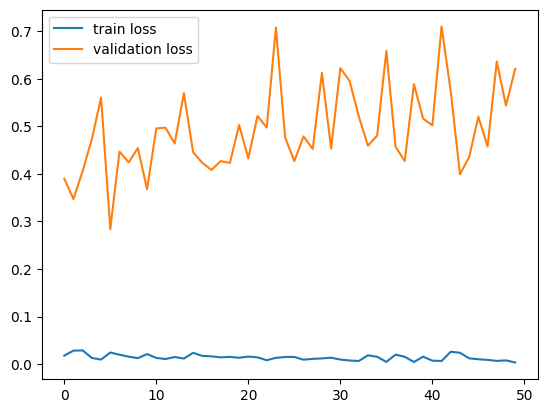

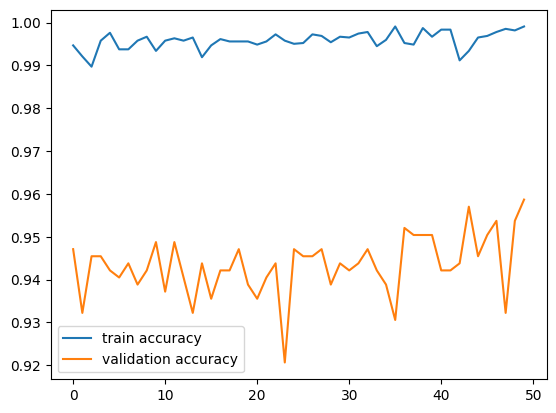

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test0.jpg


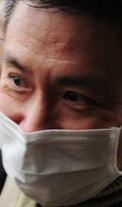

1/1 [==============================] - 0s 421ms/step
[[0.00378897 1.        ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test1.jpg


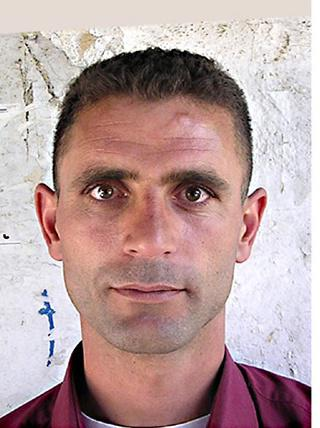

1/1 [==============================] - 0s 35ms/step
[[0.9470975  0.11310389]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')